In [1]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("abcnews-date-text.csv", quoting = 3)

In [3]:
# Cleaning the text
import re
import nltk
nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Bhalsod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
corpus = [] 
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['headline_text'][i]) 
    review = review.lower() 
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) 
    corpus.append(review)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2000) 
X = cv.fit_transform(corpus).toarray() 

In [6]:
terms = cv.get_feature_names()
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 9 , init='k-means++' , max_iter=300 , n_init=10 , random_state= 0)
km.fit(X)
clusters = km.labels_.tolist()

In [8]:
from sklearn.utils.extmath import randomized_svd
U, Sigma, VT = randomized_svd(X, n_components=10, n_iter=100,random_state=122)

In [9]:
for i,comp in enumerate(VT):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Concept "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Concept 0: 
us
 
man
 
fire
 
iraq
 
turkey
 
club
 
charg
 
Concept 1: 
man
 
charg
 
murder
 
court
 
stab
 
face
 
polic
 
Concept 2: 
plan
 
rain
 
govt
 
nsw
 
claim
 
new
 
council
 
Concept 3: 
iraq
 
un
 
new
 
war
 
plan
 
court
 
council
 
Concept 4: 
rain
 
drought
 
man
 
water
 
break
 
may
 
iraq
 
Concept 5: 
plan
 
us
 
fire
 
water
 
world
 
anti
 
court
 
Concept 6: 
claim
 
govt
 
court
 
new
 
high
 
back
 
face
 
Concept 7: 
council
 
day
 
fire
 
un
 
secur
 
welcom
 
one
 
Concept 8: 
govt
 
back
 
fire
 
nsw
 
man
 
iraq
 
call
 
Concept 9: 
claim
 
us
 
council
 
man
 
govt
 
reject
 
price
 


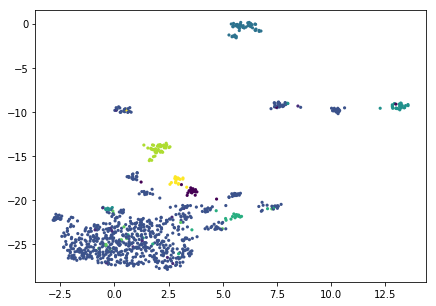

In [10]:
import umap
X_topics=U*Sigma
embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, random_state=12).fit_transform(X_topics)
#embedding = umap.__package__.ca
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = clusters,s = 10, edgecolor='none')
plt.show()